In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Example on Existing Synthetic Network</h1>
<h2 style="text-align: center;">network-only Bayes classifier (nBC) as relational model</h2>

<h2>Dependencies</h2>

In [2]:
%load_ext autoreload
%autoreload 2

from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from utils import viz
from utils import io

<h2>Parameters</h2>

In [3]:
kind = "BAH"                       # network generative model type
N = 2000                           # number of nodes
m = 4                              # minimun degree (proxy of density)
H = 0.1                            # homophily
B = 0.3                            # class balance (minority fraction)
sampling = "nedges"                # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
pseeds = 0.8                       # fraction of nodes to sample 
epoch = 1                          # epoch (iteration number #)
LC = "prior"                       # local model
RC = "nBC"                         # relational model
CI = "relaxation"                  # inference
OUTPUT = "../results-individual"   # directory to store results

<h2>1. Network</h2>

In [9]:
net = Network(kind)
net.create_network(N=N,m=m,B=B,H=H)
net.info()

Name: homophilic_barabasi_albert
Type: Graph
Number of nodes: 2000
Number of edges: 7984
Average degree:   7.9840
{'b': 0.3, 'Hmm': None, 'km': 12.688333333333333, 'labels': ['blue', 'red'], 'attributes': ['color'], 'fullname': 'BAH-N2000-m4-B0.3-H0.1-i1-x1-h0.1-k8.0-km12.7-kM6.0', 'H': 0.1, 'n': 2000, 'e': 7984, 'kind': 'BAH', 'k': 7.984, 'group': ['M', 'm'], 'i': 1, 'N': 2000, 'min_degree': 4, 'class': 'color', 'density': 0.00399399699849925, 'HMM': None, 'kM': 5.9678571428571425, 'B': 0.3, 'h': 0.1, 'name': 'homophilic_barabasi_albert', 'x': 1, 'm': 4}


<h2>2. Sampling</h2>

In [10]:
sam = Sampling(sampling, net.G, pseeds, epoch)
sam.extract_subgraph()
sam.info()

Name: homophilic_barabasi_albert
Type: Graph
Number of nodes: 1600
Number of edges: 2005
Average degree:   2.5063
{'Hmm': None, 'method': 'nedges', 'i': 1, 'km': 3.8346456692913384, 'labels': ['blue', 'red'], 'attributes': ['color'], 'fullname': 'BAH-N2000-m4-B0.3-H0.1-i1-x1-h0.1-k8.0-km12.7-kM6.0', 'H': 0.1523326811651722, 'm': 1, 'epoch': 1, 'e': 2005, 'group': ['M', 'm'], 'pseeds': 0.8, 'k': 2.50625, 'N': 1600, 'class': 'color', 'density': 0.001567385866166354, 'HMM': None, 'kM': 1.8882783882783882, 'B': 0.3175, 'h': 0.1, 'name': 'homophilic_barabasi_albert', 'x': 1, 'kind': 'BAH'}


<h2>3. Modeling</h2>

In [11]:
local_model = Local(LC)
local_model.learn(sam.Gseeds)
local_model.info()

blue    0.682272
red     0.317728
dtype: float64


In [12]:
relational_model = Relational(RC).get_model()
relational_model.learn(sam.Gseeds)
relational_model.info()

          blue       red
blue  0.120640  0.879360
red   0.930769  0.069231


<h2>4. Inference</h2>

In [13]:
inference = Inference(CI)
inference.predict(net.G, local_model, relational_model)
inference.evaluation()
inference.summary()
inference.save(OUTPUT)

(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(6.6007427252414874e-06, 4.009391965433889e-06, 1.1088962033152915e-07, 1.4085040894653735e-06, 1.7890345735541355e-05)

Prediction in 209.2636067867279 seconds
ROCAUC: 0.9980590062111802
ROCAUC curve: 0.9980590062111802
MAE: 0.025
ccm: 0.9782608695652174
ccM: 0.974025974025974
bias: 0.5010845986984815

../results-individual creating...
../results-individual created!
BAH-N2000-m4-B0.3-H0.1-i1-x1-h0.1-k8.0-km12.7-kM6.0_nedges creating...
BAH-N2000-m4-B0.3-H0.1-i1-x1-h0.1-k8.0-km12.7-kM6.0_nedges created!
BAH-N2000-m4-B0.3-H0.1-i1-x1-h0.1-k8.0-km12.7-kM6.0_nedges/P80_graph.gpickle saved!
BAH-N2000-m4-B0.3-H0.1-i1-x1-h0.1-k8.0-km12.7-kM6.0_nedges/P80_samplegraph.gpickle saved!
BAH-N2000-m4-B0.3-H0.1-i1-x1-h0.1-k8.0-km12.7-kM6.0_nedges/P80_evaluation.pickle saved!


<h2>5. Results</h2>

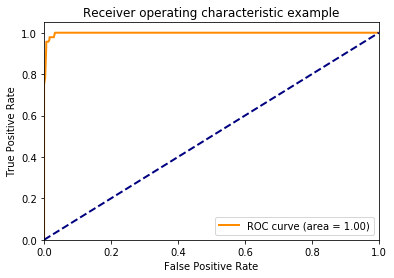

In [14]:
fn = None
viz.plot_rocauc_curve(inference.fpr, inference.tpr, inference.rocauc_curve, fn)